## Dependencies

In [1]:
# System and Versioning libraries
import sys
import importlib
from packaging import version

# ML libraries
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Data Analytics libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Custom libraries
import utils as ut

Reloading custom libraries

In [2]:
importlib.reload(ut)

<module 'utils' from 'e:\\david\\Documents\\ML-Projects\\supervised_regression\\utils.py'>

Checking if the Python version is 3.7 or above

In [4]:
print(sys.version)
assert sys.version_info >= (3,7)

3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]


Checking if the Scikit-Learn version is 1.0.1 or above

In [5]:
print(sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse('1.0.1')

1.3.2


## Data Extraction

Downloading data and creating directories

In [3]:
ut.downloadHousingData()

Creating the dataframe

In [2]:
housingDf = pd.read_csv('data/housing.csv')

Viewing data

In [5]:
housingDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Dataframe Information

Checking dataframe info

In [5]:
housingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The ocean_proximity column is an object data type, so is important to check its values

In [12]:
housingDf['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Obtaining descriptive statistics for numeric data

In [11]:
housingDf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plotting histograms for numerical data

**Important**: Median income values are tens of thousands of dollars. For example, 3 means 30,000 Annual avarage income. This feature is also capped.

* Upper cap: 15
* Lower cap: 0.5

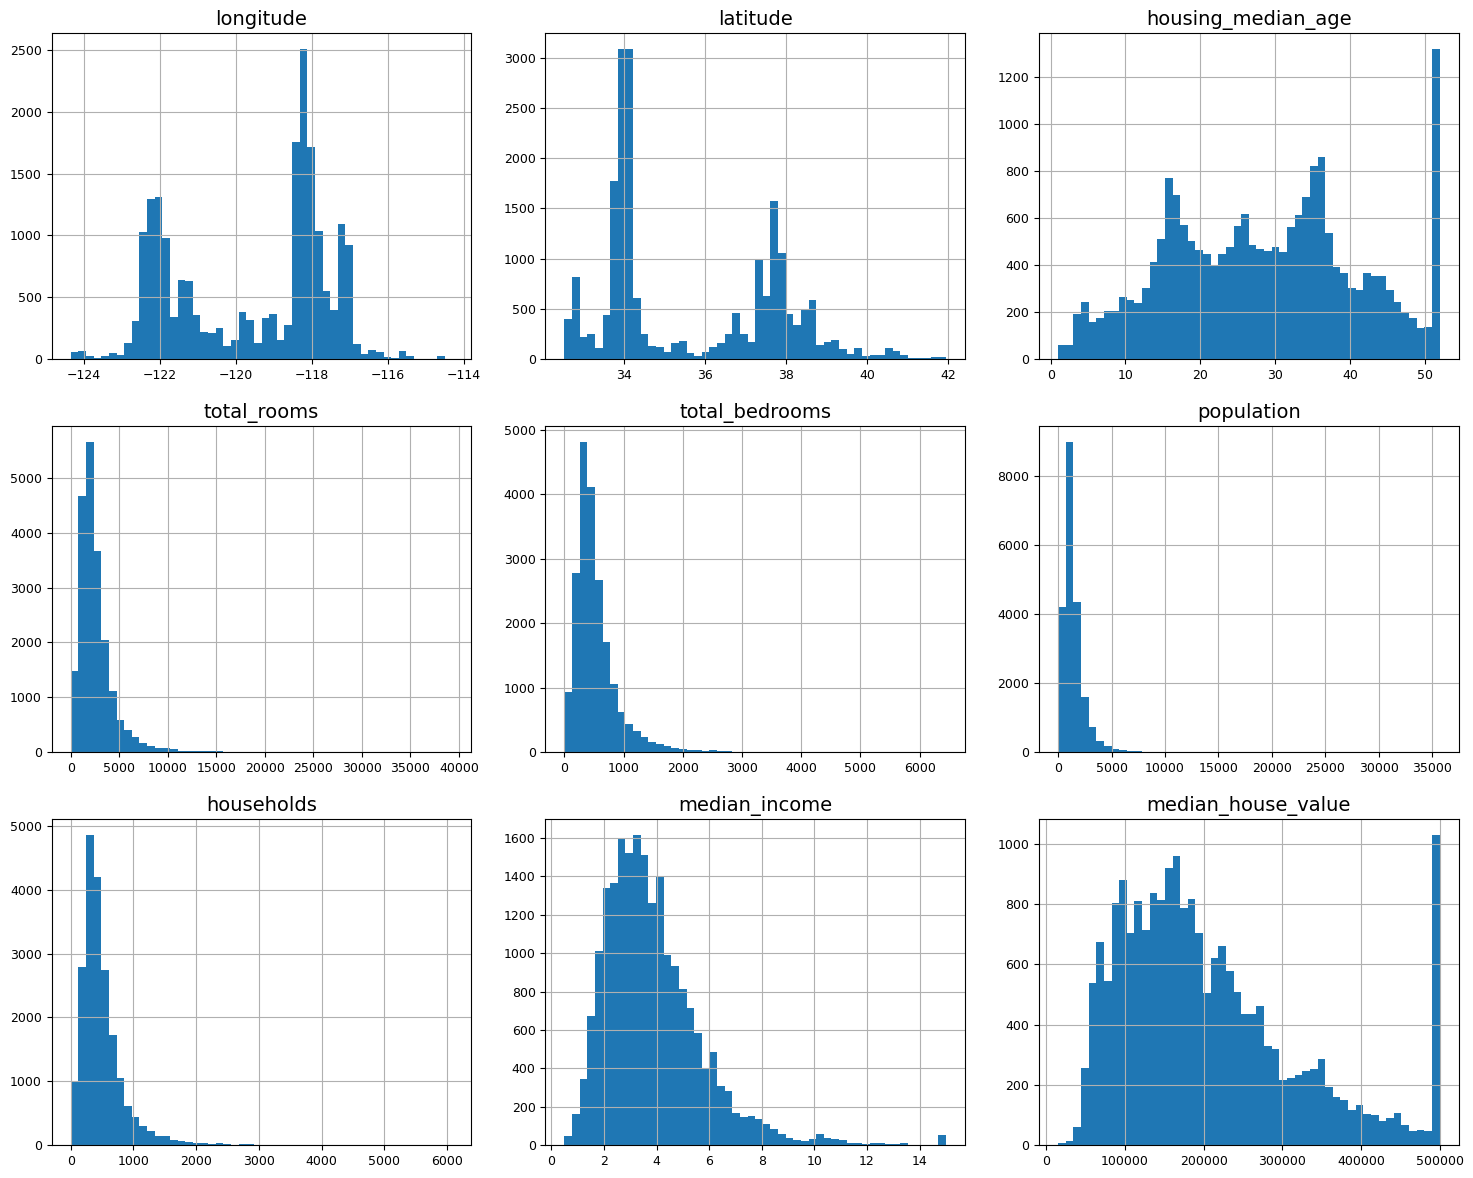

In [8]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)

housingDf.hist(bins=50, figsize=(15,12))
ut.saveGraph('attribute_histogram')
plt.show()

## Train and Test Sets

### Random Sampling

Creating a random sample for test and train datasets. This method is not suitable for incremental datasets and re-training because the entry of new data will affect the data in the training and test set. With the time, the model will learn all data from both sets.
 
This method is only suitable when the dataset is large enough for avoiding biases.

In [5]:
trainSet, testSet = ut.randomDataSplitter(housingDf, 0.2)

print(len(trainSet))
print(len(testSet))

16512
4128


Importing sklearn function for splitting data can do a similar task as the Custom function created `randomDataSplitter()`, but is more convenient thanks to the capability of define important parameters such as the random state.

In [3]:
trainSet, testSet = train_test_split(housingDf, test_size=0.2, random_state=42)

print(len(trainSet))
print(len(testSet))

16512
4128


### Stratified Sampling

Is a useful sampling used when the classes inside the dataset are not evenly distributed. In this sampling the data is stratified and then sampled acourding to the proportions of those strata.

For numeric values the data should be stratified through the prior assignation of labels for each interval of values.

In [4]:
housingDf['income_category'] = pd.cut(housingDf['median_income'], bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])
housingDf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [5]:
incomeValueCount = housingDf['income_category'].value_counts()
incomeValueCount = incomeValueCount.sort_index()

x = incomeValueCount.index.values
y = incomeValueCount.values

In [7]:
type(y)

numpy.ndarray

In [79]:
def format_with_thousands_separators(x, p):
    return "{:,}".format(int(x))

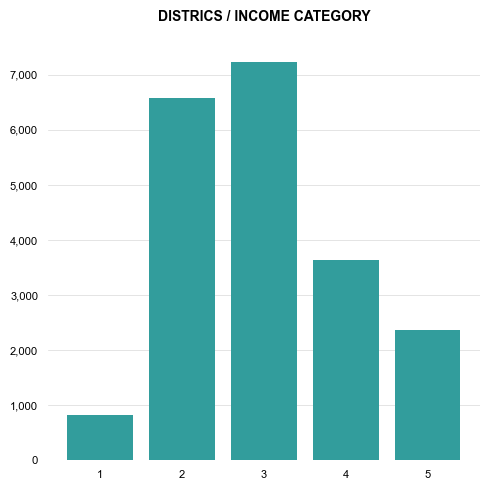

In [102]:
fig, ax = plt.subplots(figsize=(5, 5))

# Creating the bar graph
ax.bar(x, y, color='#329D9C')

# Grid configuration
ax.grid(True, color='grey', linewidth='0.5', axis='y', alpha=0.3)

# Setting grid below the graph
ax.set_axisbelow(True)

# Set the title aligned to the left
ax.set_title('DISTRICS / INCOME CATEGORY', loc='center', pad=15, weight='bold', fontsize=10, fontfamily='arial')

# Removing ticks from x, y axis
ax.tick_params(axis='both', which='both', bottom=False, left=False)

# Setting ticks labels font size and family
ax.tick_params(axis='x', labelsize=8, labelfontfamily='arial')
ax.tick_params(axis='y', labelsize=8, labelfontfamily='arial')

# Removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Y axis values format
ax.yaxis.set_major_formatter(FuncFormatter(format_with_thousands_separators))

# plt.show()
ut.saveGraph('income_category_bar')